Primary fuel and Capacity are our target variable

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
data=pd.read_csv('4.Globalpower.csv')

Successfully imported the dataset into the variabe data

In [3]:
#Viewing the data
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see the top 5 rows and last 5 rows of the data inside the dataset.

In [4]:
#Let us see the columns present in the given data
col=data.columns
col

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#Before dropping ,let us take a look of those columns
data['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

In our subset data, we all rows have only India data, so we can drop both the columns country, and country_name.

In [6]:
#Let us check the column country also , if there are any other country in it
data['country'].value_counts()

IND    908
Name: country, dtype: int64

It also have the same data

In [7]:
#checking url column
data['url'].value_counts()

http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.peda.gov.in/main/SPVPowerProjects.html                                     4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/SGS-UKL1353506542.98/view                          1
http://www.monosteel.in                                                               1
http://dssk.co.in/                                                                    1
https://www.jaibalajigroup.com/power.html                                             1
http://rkmpowergen.in/                                                                1
Name: url, Length: 304, dtype: i

There are many urls from where we are getting this info. It is not required for our analysis, so let us drop this column.

In [8]:
#Let us see how many unique websites are present
data['url'].nunique()

304

There are 304 unique links, from where our data is collected

In [9]:
#Checking the column name, how many different powerplants data we had
data['name'].nunique()

908

We can see the data we had has no duplicates, it gives details of 908 powerplants in our country

In [10]:
data['gppd_idnr'].nunique()

908

So all the different power plants have different id's , No duplicate record. checked 

We can drop one of the column either name or id, i prefer to drop id , than name. because in case of general use, user might know the name of plant than it's id.. so i am dropping the id

In [11]:
#Dropping the unnecessary columns - country,country_long, url, powerplant id  and saving into new data frame
df=data.drop(['country','country_long','gppd_idnr','url'],axis=1)


We dropped the columns and saved into new dataset namely df

In [12]:
df.shape

(908, 21)

We can see that there are 21 columns in our data now.

We can drop latitude and longitude now, before we will make a new column to get the city name using those coordinates.. it will help to analyze


In [13]:
coord=['latitude','longitude']
for i in coord:
    print(data[i].nunique())
    

837
828


We can see there are 837 unique latitude values and 828 unique longitude values. i.e we can tell that there are multiple powerplants in few locations.

In [14]:
#Let us check brief info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      908 non-null    object 
 1   capacity_mw               908 non-null    float64
 2   latitude                  862 non-null    float64
 3   longitude                 862 non-null    float64
 4   primary_fuel              908 non-null    object 
 5   other_fuel1               199 non-null    object 
 6   other_fuel2               1 non-null      object 
 7   other_fuel3               0 non-null      float64
 8   commissioning_year        528 non-null    float64
 9   owner                     342 non-null    object 
 10  source                    908 non-null    object 
 11  geolocation_source        889 non-null    object 
 12  wepp_id                   0 non-null      float64
 13  year_of_capacity_data     520 non-null    float64
 14  generation

We can see the data types of columns,all are correct as observed. 

In [15]:
#Making a single column with co ordinates. Now we will drop latitude and longitude
df['Co-ordin']=df[coord].apply(lambda x:','.join(x.values.astype(str)),axis=1)
df['Co-ordin']


0      28.1839,73.2407
1       24.7663,74.609
2      21.9038,69.3732
3      23.8712,91.3602
4      21.9603,82.4091
            ...       
903    16.2949,77.3568
904    12.8932,78.1654
905    15.2758,75.5811
906      24.35,73.7477
907     9.9344,77.4768
Name: Co-ordin, Length: 908, dtype: object

We made two columns into 1 for ease.

In [16]:
df=df.drop(['latitude','longitude'],axis=1)

We dropped the columns latitude and longitude

now we will get the names of city and state based on coordinates

In [17]:
from geopy.geocoders import Nominatim
# initialize Nominatim API 
geolocator = Nominatim(user_agent="locfinder",timeout=10)
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [18]:
df['Co-ordin'][0]

'28.1839,73.2407'

In [19]:
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm
df['address']=df['Co-ordin'].apply(geocode)

In [20]:
df['address']

0      (Badrasar, Bikaner Tehsil, Bikaner, Rajasthan,...
1      (Medi Ka Amrana, Chittaurgarh Tehsil, Chittorg...
2      (Lamba, Kalyanpur Taluka, Devbhumi Dwaraka Dis...
3      (Agartala, Mohanpur, West Tripura, Tripura, 79...
4      (Akaltara-KMPCL Coal Power Plant, Akaltara Tah...
                             ...                        
903    (Yermarus Thermal Power Station, Eganuru, Raya...
904    (Yalesandra, Bangarapet taluk, Kolar district,...
905    (Elishirura, Gadag taluk, Gadag district, Karn...
906    (Zawar, Sarada Tehsil, Udaipur, Rajasthan, 313...
907    (Theni, Theni District, Tamil Nadu, India, (9....
Name: address, Length: 908, dtype: object

In [21]:
#Dummy data frame to split and store the address 
dl=df.address.apply(lambda x: pd.Series(str(x).split(",")))
dl

,0,1,2,3,4,5,6,7,8,9
0,Badrasar,Bikaner Tehsil,Bikaner,Rajasthan,India,NaN,NaN,NaN,NaN,NaN
1,Medi Ka Amrana,Chittaurgarh Tehsil,Chittorgarh,Rajasthan,312613,India,NaN,NaN,NaN,NaN
2,Lamba,Kalyanpur Taluka,Devbhumi Dwaraka District,Gujarat,India,NaN,NaN,NaN,NaN,NaN
3,Agartala,Mohanpur,West Tripura,Tripura,799001,India,NaN,NaN,NaN,NaN
4,Akaltara-KMPCL Coal Power Plant,Akaltara Tahsil,Janjgir-Champa,Chhattisgarh,India,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
903,Yermarus Thermal Power Station,Eganuru,Rayachuru taluku,Raichur district,Karnataka,India,NaN,NaN,NaN,NaN
904,Yalesandra,Bangarapet taluk,Kolar district,Karnataka,563129,India,NaN,NaN,NaN,NaN
905,Elishirura,Gadag taluk,Gadag district,Karnataka,582120,India,NaN,NaN,NaN,NaN
906,Zawar,Sarada Tehsil,Udaipur,Rajasthan,313901,India,NaN,NaN,NaN,NaN


we splitted and stored the addresses into new df by splitting, we need only state

In [23]:
#Checking for null values
df.isnull().sum()

name                          0
capacity_mw                   0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
Co-ordin                      0
address                       0
dtype: int64

In [24]:
#we now dropped the columns
df=df.drop(['estimated_generation_gwh','other_fuel3'],axis=1)

In [25]:
#We can drop column wepp-id also since it has no data
df=df.drop('wepp_id',axis=1)

In [26]:
#In column other fuel 2 
df['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

there is only one plant using other fuel 2 , i.e oil.. let us see the details of that plant

In [27]:
#getting the row number
fuel2=np.where(df['other_fuel2']=='Oil')
fuel2

(array([812], dtype=int64),)

In [28]:
plant=df.iloc[812,:]
plant

name                                                         TORANGALLU IMP
capacity_mw                                                             260
primary_fuel                                                           Coal
other_fuel1                                                    Cogeneration
other_fuel2                                                             Oil
commissioning_year                                                     1999
owner                                                                   NaN
source                                        Central Electricity Authority
geolocation_source                                                      WRI
year_of_capacity_data                                                  2018
generation_gwh_2013                                                 2028.78
generation_gwh_2014                                                 2074.31
generation_gwh_2015                                                  2029.2
generation_g

Now we know detils of this column, let us drop the column ,fuel2

In [29]:
df.drop('other_fuel2',axis=1,inplace=True)

In [30]:
cols=df.columns
cols

Index(['name', 'capacity_mw', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source', 'Co-ordin', 'address'],
      dtype='object')

In [31]:
#We dont require this column also
df['generation_data_source']

0                                NaN
1                                NaN
2                                NaN
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
903    Central Electricity Authority
904                              NaN
905                              NaN
906                              NaN
907                              NaN
Name: generation_data_source, Length: 908, dtype: object

In [32]:
df=df.drop('generation_data_source',axis=1)

In [33]:
#for model we dont require location and coordinates
df_new=df.drop(['Co-ordin','address'],axis=1)

In [34]:
#Checking for missing values
df_new.isnull().sum()

name                       0
capacity_mw                0
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    566
source                     0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

Other fuel 1 is missing because, they might not using other fuels, only one primary fuel is used 

In [35]:
gen=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']
for i in gen:
    print(f'Skewness in {i}:',df_new[i].skew())

Skewness in generation_gwh_2013: 3.4163376068921907
Skewness in generation_gwh_2014: 3.3576826439934453
Skewness in generation_gwh_2015: 3.6790163259146933
Skewness in generation_gwh_2016: 3.524785292432588
Skewness in generation_gwh_2017: 3.5768486700993036


In [36]:
#skewness is more, so let us fill it with median
for i in gen:
    df_new[i]=df_new[i].fillna(df_new[i].median())

In [37]:
df_new['other_fuel1'].nunique()

3

There are 3 types of fuels used as otherfuel 1

In [38]:
df_new['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [39]:
199/908

0.21916299559471367

only 22% of the power plants are using other fuel along with primary

In [40]:
#Let us replace the missing values with text no
df_new['other_fuel1']=df_new['other_fuel1'].fillna('no')

Now we filled the missing rows with no

In [41]:
df_new['other_fuel1'].value_counts()

no              709
Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [42]:
#Commisioning year
df_new['commissioning_year'].nunique()

73

let us make this column into no. of years since commisioned , to be helpful

In [43]:
df_new['yearsold']=2021-df_new['commissioning_year']
df_new['yearsold']

0      10.0
1       NaN
2       NaN
3      17.0
4       6.0
       ... 
903     5.0
904     NaN
905     NaN
906     NaN
907     NaN
Name: yearsold, Length: 908, dtype: float64

we made a new column with yearsold

In [44]:
#drop the commisioned year
df_new.drop('commissioning_year',axis=1,inplace=True)

In [45]:
#Now let us fill the missing rows in yearsold
df_new['yearsold'].describe()

count    528.000000
mean      24.123106
std       17.047817
min        3.000000
25%        9.750000
50%       21.000000
75%       33.000000
max       94.000000
Name: yearsold, dtype: float64

In [46]:
#we will fill it with mean or median , to decide we wil check skewness
df_new['yearsold'].skew()

1.056131855530986

In [47]:
#it had more skewness, so we will fill with median
df_new['yearsold']=df_new['yearsold'].fillna(df_new['yearsold'].median())

now we filled the missing data with median

In [48]:
df_new['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

we doesnt require this column 

In [49]:
df_new=df_new.drop('geolocation_source',axis=1)

In [50]:
#checking year_of_capacity_data    
df['year_of_capacity_data'].nunique()

1

It has onlyone value, lets drop it

In [51]:
df_new.drop('year_of_capacity_data',axis=1,inplace=True)

dropped the column

In [52]:
#Owner column
df_new['owner'].nunique()

280

There are 280 different owners as of data, we can't give ownership to others / fill it , so let us kee missing values as it is or, fill it with gov. for instance

In [53]:
df_new['owner'].value_counts()

Jk Cement ltd                                            4
Sterling Agro Industries ltd.                            4
Acc Acc ltd                                              4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
Karnataka Power Corporation Limited                      3
                                                        ..
Solar Energy Centre                                      1
Vishwanath Sugars ltd                                    1
K. N. Ram                                                1
Lanco Solar Energy Private Limited                       1
Vikram Vikram cement                                     1
Name: owner, Length: 280, dtype: int64

In [54]:
df_new['owner']=df_new['owner'].fillna('no data')

In [55]:
df_new.isnull().sum()

name                   0
capacity_mw            0
primary_fuel           0
other_fuel1            0
owner                  0
source                 0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
yearsold               0
dtype: int64

now there are no missing values

In [56]:
#Name column also not required
df_new.drop('name',axis=1,inplace=True)

In [57]:
df_new.shape

(908, 11)

Now we have 908 rows and 11 columns

In [58]:
#Let us see the stats of columns
df_new.describe(include='all')

,capacity_mw,primary_fuel,other_fuel1,owner,source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,yearsold
count,908.000000,908,908,908,908,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
unique,NaN,8,4,281,191,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coal,no,no data,Central Electricity Authority,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,259,709,566,520,NaN,NaN,NaN,NaN,NaN,NaN
mean,321.046378,NaN,NaN,NaN,NaN,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,22.816079
std,580.221767,NaN,NaN,NaN,NaN,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,16.837500,NaN,NaN,NaN,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
50%,60.000000,NaN,NaN,NaN,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
75%,388.125000,NaN,NaN,NaN,NaN,797.063475,805.760000,701.027250,716.728350,807.601700,24.000000


In [59]:
#To predict capacity we doesnt require source ,owner also , so let us drop them
df_new.drop(['source','owner'],axis=1,inplace=True)

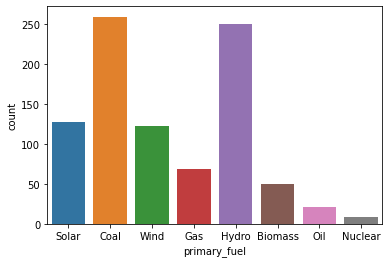

In [60]:
sns.countplot(df['primary_fuel'])

we can see majorityb of plants using coal and hydro

In [61]:
#let us encode the columns primary fuel and other_fuel 1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
enc=['primary_fuel','other_fuel1']
for i in enc:
    df_new[i]=le.fit_transform(df_new[i])



we encoded the columns

In [62]:
#Now let us see the columns
df_new.describe()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,yearsold
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,3.205947,2.776432,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,22.816079
std,580.221767,2.281339,0.429886,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,13.085938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,16.837500,1.000000,3.000000,797.063475,805.760000,701.027250,716.728350,807.601700,18.000000
50%,60.000000,3.000000,3.000000,797.063475,805.760000,701.027250,716.728350,807.601700,21.000000
75%,388.125000,6.000000,3.000000,797.063475,805.760000,701.027250,716.728350,807.601700,24.000000
max,4760.000000,7.000000,3.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,94.000000


In [63]:
#Skewness'
df_new.skew()

capacity_mw            3.193257
primary_fuel           0.471141
other_fuel1           -1.619441
generation_gwh_2013    5.535740
generation_gwh_2014    5.325540
generation_gwh_2015    5.565770
generation_gwh_2016    5.278233
generation_gwh_2017    5.312975
yearsold               1.650230
dtype: float64

In [64]:
#Reduce skewness in all columns , except capacity .. since it is target 
#Removing outliers
from scipy.stats import zscore
z=abs(zscore(df_new))
z

array([[0.54931054, 1.22541756, 0.52035034, ..., 0.27820854, 0.27617103,
        0.97991772],
       [0.38462759, 0.96748576, 0.52035034, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.48602401, 1.66399822, 0.52035034, ..., 0.27820854, 0.27617103,
        0.13885747],
       ...,
       [0.50964868, 1.66399822, 0.52035034, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.41566731, 0.96748576, 0.52035034, ..., 0.27820854, 0.27617103,
        0.13885747],
       [0.52516854, 1.66399822, 0.52035034, ..., 0.27820854, 0.27617103,
        0.13885747]])

In [65]:
Threshold = 3
df_new=df_new[(z<3).all(axis=1)]
df_new.shape

(863, 9)

We removed the outliers

In [66]:
#Dataloss percent
1-(863/908)

0.04955947136563876

4% of data is lost

In [67]:
#now checking skewness
df_new.skew()

capacity_mw            2.017518
primary_fuel           0.421444
other_fuel1           -1.498990
generation_gwh_2013    3.127406
generation_gwh_2014    2.977041
generation_gwh_2015    2.765705
generation_gwh_2016    2.708965
generation_gwh_2017    2.600212
yearsold               1.177042
dtype: float64

In [68]:
#we will reduce skewness in all generation columns
for i in gen:
    df_new[i]=df_new[i]+1
    df_new[i]=np.sqrt(df_new[i])

reduced the skewness 

In [70]:
df_new['yearsold']=np.sqrt(df_new['yearsold'])

In [71]:
#We reduced the skewness , checking
df_new.skew()

capacity_mw            2.017518
primary_fuel           0.421444
other_fuel1           -1.498990
generation_gwh_2013    1.652061
generation_gwh_2014    1.539007
generation_gwh_2015    1.520788
generation_gwh_2016    1.491755
generation_gwh_2017    1.346276
yearsold               0.184983
dtype: float64

We reduced the skewness in all columns

In [73]:
#Checking the correlation
df_new.corr()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,yearsold
capacity_mw,1.000000,-0.398519,-0.627841,0.559690,0.585800,0.653534,0.727761,0.722606,-0.299906
primary_fuel,-0.398519,1.000000,0.483402,-0.185796,-0.191372,-0.221058,-0.237922,-0.220846,0.134891
other_fuel1,-0.627841,0.483402,1.000000,-0.414207,-0.441099,-0.477383,-0.523308,-0.511344,0.360764
generation_gwh_2013,0.559690,-0.185796,-0.414207,1.000000,0.932817,0.829842,0.759155,0.699696,-0.008166
generation_gwh_2014,0.585800,-0.191372,-0.441099,0.932817,1.000000,0.883481,0.807342,0.754900,-0.061807
generation_gwh_2015,0.653534,-0.221058,-0.477383,0.829842,0.883481,1.000000,0.904592,0.825441,-0.135368
generation_gwh_2016,0.727761,-0.237922,-0.523308,0.759155,0.807342,0.904592,1.000000,0.933907,-0.220532
generation_gwh_2017,0.722606,-0.220846,-0.511344,0.699696,0.754900,0.825441,0.933907,1.000000,-0.218346
yearsold,-0.299906,0.134891,0.360764,-0.008166,-0.061807,-0.135368,-0.220532,-0.218346,1.000000


let us visualize for better understanding

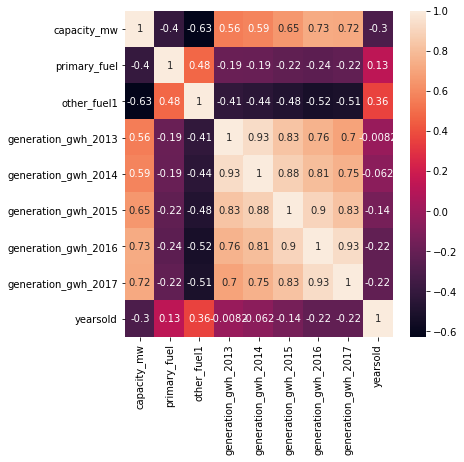

In [77]:
plt.figure(figsize=(6,6))
sns.heatmap(df_new.corr(),annot=True)

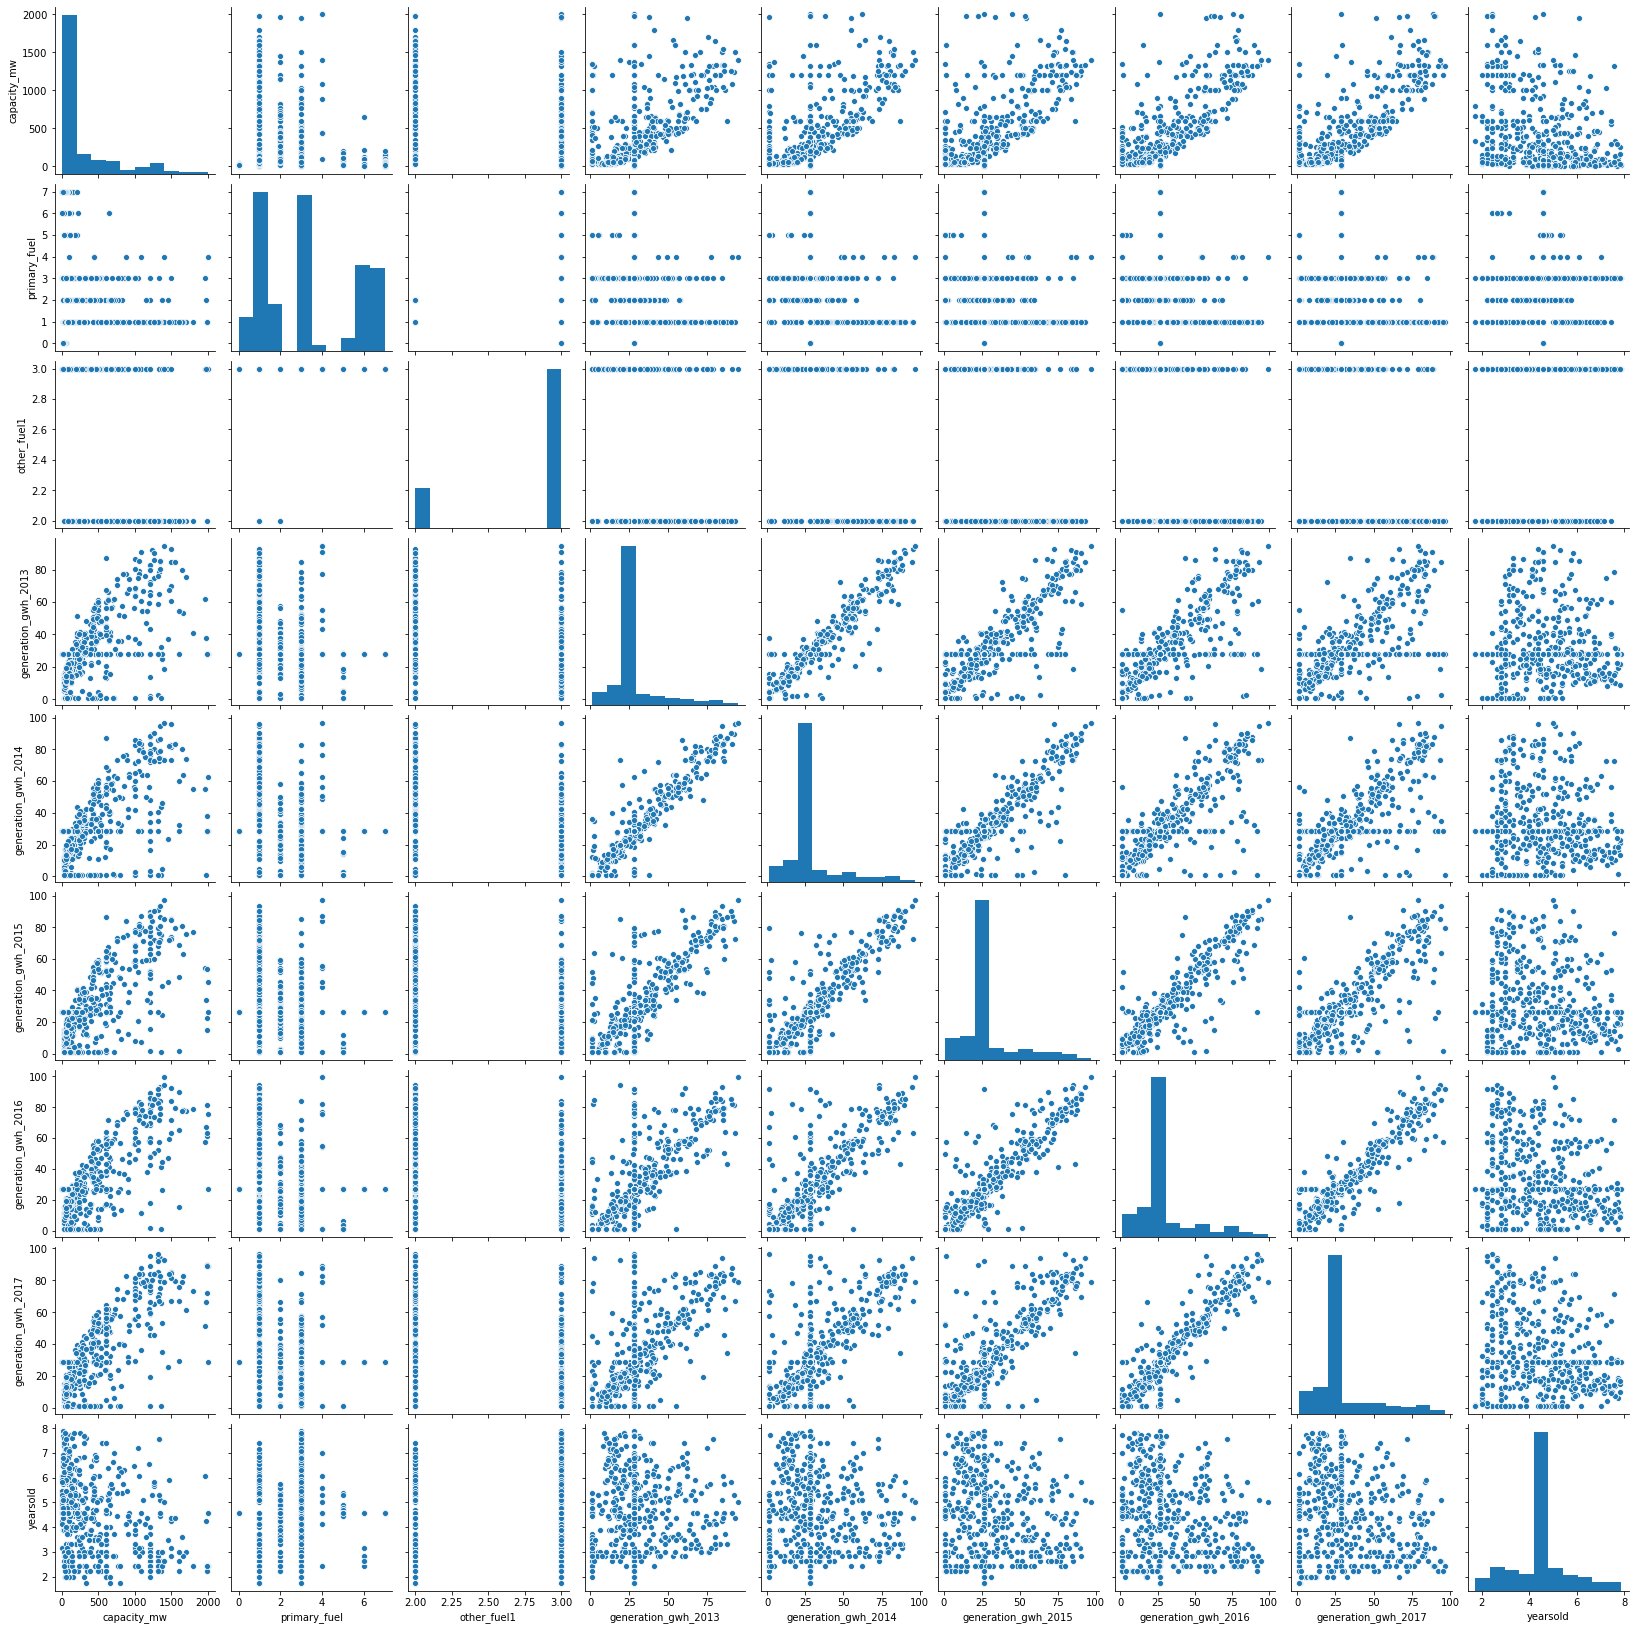

In [78]:
sns.pairplot(df_new)

In [93]:
#Let us divide the columns features and target
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']


In [81]:
#Now we splitted them
print(x.shape)
print(y.shape)

(863, 8)
(863,)


there are 863 rows and 8 columns in x
and 863 rows with 1 column in y

In [95]:
#Let us scale the data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x_scaled=scale.fit_transform(x)

In [96]:
x_scaled

array([[0.85714286, 1.        , 0.29084646, ..., 0.26199312, 0.287907  ,
        0.23286175],
       [0.14285714, 1.        , 0.29084646, ..., 0.26199312, 0.287907  ,
        0.46410694],
       [1.        , 1.        , 0.29084646, ..., 0.26199312, 0.287907  ,
        0.46410694],
       ...,
       [1.        , 1.        , 0.29084646, ..., 0.26199312, 0.287907  ,
        0.46410694],
       [0.14285714, 1.        , 0.29084646, ..., 0.26199312, 0.287907  ,
        0.46410694],
       [1.        , 1.        , 0.29084646, ..., 0.26199312, 0.287907  ,
        0.46410694]])

In [97]:
#Let us find the best random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
r2=0
rs=0
le=LinearRegression()
for i in range(1500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    r2s=r2_score(y_test,pred)
    if r2s>r2:
        r2=r2s
        rs=i
print('Best r2 score:',r2)
print('Best Random state:',i)

Best r2 score: 0.7751651454575661
Best Random state: 1499


In [102]:
#We seen best random state and its r2 score, let us split at this rs
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1499)


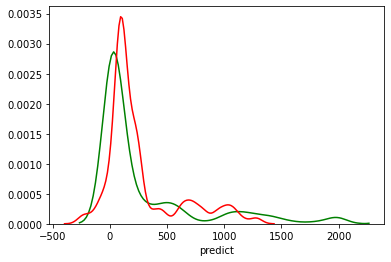

In [103]:
#let us how the model is
test=pd.DataFrame({})
test['actual']=y_test
test['predict']=pred
ax1=sns.distplot(test['actual'],hist=False,color='g')
sns.distplot(test['predict'],hist=False,color='r',ax=ax1)

model is not fit correctly

In [143]:
#Let us import other models
from sklearn.linear_model import SGDRegressor,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [144]:
models=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor()
       ,AdaBoostRegressor(),Ridge(),SGDRegressor()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'metrics of {m}:')
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('R2 Score:',r2_score(y_test,predm))
    print('\n')

metrics of LinearRegression():
Mean squared error: 77202.96170691156
R2 Score: 0.660851236362095


metrics of DecisionTreeRegressor():
Mean squared error: 64056.62165054199
R2 Score: 0.7186024531276826


metrics of SVR():
Mean squared error: 240030.61361028953
R2 Score: -0.05444252450083842


metrics of RandomForestRegressor():
Mean squared error: 38388.16841663101
R2 Score: 0.8313626890863368


metrics of KNeighborsRegressor():
Mean squared error: 55879.571640936876
R2 Score: 0.7545238263450862


metrics of GradientBoostingRegressor():
Mean squared error: 40797.36897913884
R2 Score: 0.8207791910693543


metrics of AdaBoostRegressor():
Mean squared error: 70316.19819322787
R2 Score: 0.6911044452998469


metrics of Ridge():
Mean squared error: 79003.56287247107
R2 Score: 0.6529412851684764


metrics of SGDRegressor():
Mean squared error: 83678.01168647993
R2 Score: 0.6324066644634024




In [145]:
#Cross validation checking
from sklearn.model_selection import cross_val_score
for m in models:
    cvscore=cross_val_score(m,x_scaled,y,cv=5)
    print(f'average mean of {m}:',cvscore.mean())
    print('\n')

average mean of LinearRegression(): 0.6134782132635765


average mean of DecisionTreeRegressor(): 0.6634465283722839


average mean of SVR(): -0.0357800507960605


average mean of RandomForestRegressor(): 0.7787515863301893


average mean of KNeighborsRegressor(): 0.7508253161867582


average mean of GradientBoostingRegressor(): 0.7713757117343499


average mean of AdaBoostRegressor(): 0.6010734679097349


average mean of Ridge(): 0.6221909216118207


average mean of SGDRegressor(): 0.6269768469589904




From both the model kneighors has the least difference. 

In [146]:
#Our best model is KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
predi=knr.predict(x_test)
mse=mean_squared_error(y_test,predi)
r2=r2_score(y_test,predi)
print(f'Mean squared error is : {mse}\nr2 score is: {r2}')

Mean squared error is : 55879.571640936876
r2 score is: 0.7545238263450862


In [147]:
model=pd.DataFrame({})
model['Actual']=y_test
model['Predicted']=predi
model

,Actual,Predicted
116,10.00,4.600
613,14.85,20.920
820,28.00,18.032
262,331.50,175.500
462,25.00,117.800
...,...,...
231,60.00,44.600
830,0.00,4.600
492,25.20,54.468
373,107.88,69.620


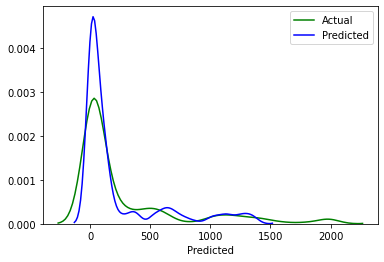

In [141]:
ax1=sns.distplot(model['Actual'],color='g',hist=False,label='Actual')
sns.distplot(model['Predicted'],color='b',hist=False,label='Predicted',ax=ax1)

Model is overfit, let us tune the model

In [148]:
from sklearn.model_selection import GridSearchCV
par={'n_neighbors':range(0,500,5),'weights':['uniform','distance'],
     'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':range(0,500,10)}
grid=GridSearchCV(knr,param_grid=par,cv=5,verbose=1)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 5 folds for each of 40000 candidates, totalling 200000 fits
score:  0.7433018258350044
best estimators: KNeighborsRegressor(leaf_size=140, weights='distance')
best parameters: {'algorithm': 'auto', 'leaf_size': 140, 'n_neighbors': 5, 'weights': 'distance'}


In [151]:
#we now got the best parameters, lets make the model
knr=KNeighborsRegressor(weights='distance',n_neighbors=5,leaf_size=140,algorithm='auto')
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('R2 score:',r2_score(y_test,pred))

Mean Squared Error: 55117.09442147914
R2 score: 0.7578733507747689


r2 score improved to 0.76 from 0.74

In [153]:
#Saving the model 
import joblib
joblib.dump(knr,'Powerplant.obj')

['Powerplant.obj']

### 2.Finding the type of primary fuel

In [154]:
xf=df_new.drop('primary_fuel',axis=1)
yf=df_new['primary_fuel']

now we splitted, into xf and yf

In [156]:
#Scaling the xf
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xf_scaled=sc.fit_transform(xf)

we now scaled the xf

In [157]:
#Finding the best random state
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
rs=0
s=0
for i in range(1000):
    xf_train,xf_test,yf_train,yf_test=train_test_split(xf_scaled,yf,test_size=0.2,random_state=i)
    svc=SVC()
    svc.fit(xf_train,yf_train)
    predic=svc.predict(xf_test)
    ac_score=accuracy_score(yf_test,predic)
    if ac_score>s:
        s=ac_score
        rs=i
print('Best rs:',rs)
print('Accuracy score:',s)

Best rs: 944
Accuracy score: 0.653179190751445


Best random state is 944, let us split at that state

In [158]:
#Splitting
xf_train,xf_test,yf_train,yf_test=train_test_split(xf_scaled,yf,test_size=0.2,random_state=944)

In [160]:
#importing different models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

Imported the models

In [162]:
#Making the model instances into a list
model=[SVC(),DecisionTreeClassifier(), RandomForestClassifier(),GradientBoostingClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(xf_train,yf_train)
    pred=m.predict(xf_test)
    print(f'metrics of {m}:')
    print('accuracy score:',accuracy_score(yf_test,pred))
    print('confusion matrix:\n',confusion_matrix(yf_test,pred))
    print('classification report:\n',classification_report(yf_test,pred))
    print('\n')

metrics of SVC():
accuracy score: 0.653179190751445
confusion matrix:
 [[ 0  0  0  0  0  0  8  0]
 [ 0 39  0  0  0  0  6  7]
 [ 0  2  0  6  0  0  0  2]
 [ 0  0  0 42  0  0  3  4]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  1  2]
 [ 0  0  0  0  0  0 22  2]
 [ 0  0  0  0  0  0 14 10]]
classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.95      0.75      0.84        52
           2       0.00      0.00      0.00        10
           3       0.84      0.86      0.85        49
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       0.41      0.92      0.56        24
           7       0.37      0.42      0.39        24

    accuracy                           0.65       173
   macro avg       0.32      0.37      0.33       173
weighted avg       0.63      0.65      0.63       173



metrics of DecisionTreeClassifier()

We got the accuracy score of the models

In [164]:
#cross validating the models to find best model
from sklearn.model_selection import cross_val_score
for m in model:
    cvscore=cross_val_score(m,xf_scaled,yf,cv=5)
    print(f'cv score of {m}:',cvscore.mean())

cv score of SVC(): 0.5620311869874983
cv score of DecisionTreeClassifier(): 0.674398440650625
cv score of RandomForestClassifier(): 0.7034144374243849
cv score of GradientBoostingClassifier(): 0.7080252722140072
cv score of KNeighborsClassifier(): 0.6616547923107945


Kneighbors has the least difference b/w cv score and accuracy score

In [165]:
knc=KNeighborsClassifier()
knc.fit(xf_train,yf_train)
pre=knc.predict(xf_test)
print('accuracy score:',accuracy_score(yf_test,pre))
print('confusion matrix:\n',confusion_matrix(yf_test,pre))
print('classification matrix:\n',classification_report(yf_test,pre))

accuracy score: 0.6647398843930635
confusion matrix:
 [[ 2  1  0  0  0  0  0  5]
 [ 2 43  1  0  0  0  3  3]
 [ 0  4  0  6  0  0  0  0]
 [ 1  1  4 42  0  0  1  0]
 [ 0  0  1  1  0  0  0  0]
 [ 1  1  0  1  0  1  0  0]
 [ 0  4  0  0  0  0 17  3]
 [ 3  8  1  0  0  0  2 10]]
classification matrix:
               precision    recall  f1-score   support

           0       0.22      0.25      0.24         8
           1       0.69      0.83      0.75        52
           2       0.00      0.00      0.00        10
           3       0.84      0.86      0.85        49
           4       0.00      0.00      0.00         2
           5       1.00      0.25      0.40         4
           6       0.74      0.71      0.72        24
           7       0.48      0.42      0.44        24

    accuracy                           0.66       173
   macro avg       0.50      0.41      0.43       173
weighted avg       0.65      0.66      0.65       173



In [171]:
#Tuning the model for improved accuracy
from sklearn.model_selection import GridSearchCV
pars={'n_neighbors':range(0,500,5),'weights':['uniform','distance'],
     'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':range(0,500,10)}
grid=GridSearchCV(knr,param_grid=pars,cv=5,verbose=1)
grid.fit(xf_scaled,yf)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 5 folds for each of 40000 candidates, totalling 200000 fits
score:  0.3581333558605716
best estimators: KNeighborsRegressor(n_neighbors=35, weights='distance')
best parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 35, 'weights': 'distance'}


In [168]:
knc=KNeighborsClassifier(n_neighbors=35,weights='distance',algorithm='auto',leaf_size=30)
knc.fit(xf_train,yf_train)
pre=knc.predict(xf_test)
print('accuracy score:',accuracy_score(yf_test,pre))
print('confusion matrix:\n',confusion_matrix(yf_test,pre))
print('classification matrix:\n',classification_report(yf_test,pre))

accuracy score: 0.6936416184971098
confusion matrix:
 [[ 5  1  0  0  0  0  0  2]
 [ 2 41  1  0  0  0  4  4]
 [ 0  4  0  6  0  0  0  0]
 [ 1  3  0 45  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  1  0  2  0  1  0  0]
 [ 4  1  0  1  0  0 17  1]
 [ 1  4  1  2  0  1  4 11]]
classification matrix:
               precision    recall  f1-score   support

           0       0.38      0.62      0.48         8
           1       0.75      0.79      0.77        52
           2       0.00      0.00      0.00        10
           3       0.78      0.92      0.84        49
           4       0.00      0.00      0.00         2
           5       0.50      0.25      0.33         4
           6       0.68      0.71      0.69        24
           7       0.61      0.46      0.52        24

    accuracy                           0.69       173
   macro avg       0.46      0.47      0.45       173
weighted avg       0.65      0.69      0.67       173



accuracy improved from 66 to 69, we need more accuracy,let us try other model

In [169]:
#Let us try for the model Gradient Boosting Classifier
gbc=GradientBoostingClassifier()
gbc.fit(xf_train,yf_train)
pred=gbc.predict(xf_test)
print('accuracy score:',accuracy_score(yf_test,pred))
print('confusion matrix:\n',confusion_matrix(yf_test,pred))
print('classification matrix:\n',classification_report(yf_test,pred))

accuracy score: 0.7109826589595376
confusion matrix:
 [[ 5  1  0  1  0  0  0  1]
 [ 2 41  1  0  1  0  3  4]
 [ 0  3  4  3  0  0  0  0]
 [ 1  0  6 42  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  1  0  2  0  1  0  0]
 [ 1  1  0  2  0  0 17  3]
 [ 0  6  1  2  0  1  2 12]]
classification matrix:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.77      0.79      0.78        52
           2       0.31      0.40      0.35        10
           3       0.81      0.86      0.83        49
           4       0.50      0.50      0.50         2
           5       0.50      0.25      0.33         4
           6       0.77      0.71      0.74        24
           7       0.60      0.50      0.55        24

    accuracy                           0.71       173
   macro avg       0.60      0.58      0.58       173
weighted avg       0.71      0.71      0.71       173



In [176]:
#parameter tuning
pars={'loss':['deviance','exponential'],'learning_rate':[0.001,0.01,0.1,0.002,0.05],'n_estimators':range(0,100,10)
     ,'criterion':['mse','mae','squared_error','friedman_mse'],'min_samples_leaf':range(0,10)}
grid=GridSearchCV(gbc,param_grid=pars,cv=5,verbose=1)
grid.fit(xf_scaled,yf)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
score:  0.7126898776717301
best estimators: GradientBoostingClassifier(n_estimators=70)
best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'min_samples_leaf': 1, 'n_estimators': 70}


In [178]:
#Let us try for the model Gradient Boosting Classifier
gbc=GradientBoostingClassifier(learning_rate=0.1,loss='deviance',n_estimators=70,min_samples_leaf=1,criterion='friedman_mse')
gbc.fit(xf_train,yf_train)
pred=gbc.predict(xf_test)
print('accuracy score:',accuracy_score(yf_test,pred))
print('confusion matrix:\n',confusion_matrix(yf_test,pred))
print('classification matrix:\n',classification_report(yf_test,pred))

accuracy score: 0.7341040462427746
confusion matrix:
 [[ 5  1  0  0  0  0  0  2]
 [ 2 41  0  0  1  0  3  5]
 [ 0  3  4  3  0  0  0  0]
 [ 1  0  5 43  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  1  0  1  0  1  0  1]
 [ 1  1  0  2  0  0 17  3]
 [ 0  6  0  0  0  1  2 15]]
classification matrix:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.77      0.79      0.78        52
           2       0.40      0.40      0.40        10
           3       0.88      0.88      0.88        49
           4       0.50      0.50      0.50         2
           5       0.50      0.25      0.33         4
           6       0.77      0.71      0.74        24
           7       0.58      0.62      0.60        24

    accuracy                           0.73       173
   macro avg       0.62      0.60      0.60       173
weighted avg       0.73      0.73      0.73       173



In [ ]:
Now we have model with accuracy 73% 

Auc - Roc curve

No handles with labels found to put in legend.


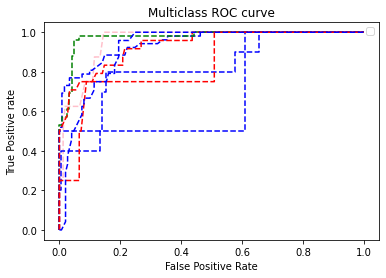

In [180]:
#AUC-ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

#predicting the probability
pred_prob=gbc.predict_proba(xf_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(yf_test, pred_prob[:,i], pos_label=i)
    
import random
color=['orange','blue','green','red','pink','yellow','black']
# plotting 
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color))
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    


We can see for one of the value tpr is 0.5 only

In [183]:
#Checking the auc_roc_score:
auc_score=roc_auc_score(yf_test,gbc.predict_proba(xf_test),multi_class='ovr')
auc_score

0.8851151220094635

Probability of prediction to be right is 88.5%

In [184]:
#Saving the model
import joblib
joblib.dump(gbc,'Power_plant.obj')

['Power_plant.obj']